<a href="https://colab.research.google.com/github/radhika1234567/Age-related-condition/blob/main/final_notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd "/content/drive/My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


In [5]:
df = pd.read_csv("train.csv")

In [6]:
df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [7]:
df.isna().sum().sort_values(ascending=False)

EL       60
BQ       60
CC        3
FS        2
CB        2
FL        1
FC        1
DU        1
GL        1
EE        0
EB        0
EU        0
DY        0
EH        0
EJ        0
DV        0
EP        0
EG        0
Id        0
DL        0
FD        0
FE        0
FI        0
FR        0
GB        0
GE        0
GF        0
GH        0
GI        0
DN        0
DH        0
DI        0
BR        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BZ        0
AB        0
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
Class     0
dtype: int64

In [8]:
df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [10]:
df['EJ'].unique()

array(['B', 'A'], dtype=object)

In [11]:
df['EJ']=df['EJ'].map({'A':0,'B':1})

In [12]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

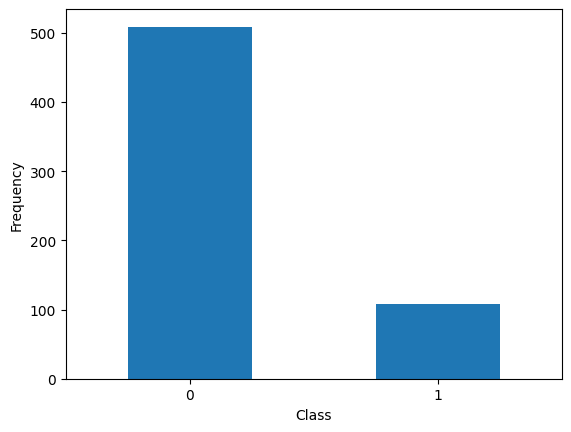

In [13]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xlabel("Class")
plt.ylabel("Frequency")

### Data is imbalance

In [14]:
df.duplicated().any()

False

In [15]:
misscol = [col for col in df.columns if df[col].isna().sum() !=0]

In [16]:
misscol

['BQ', 'CB', 'CC', 'DU', 'EL', 'FC', 'FL', 'FS', 'GL']

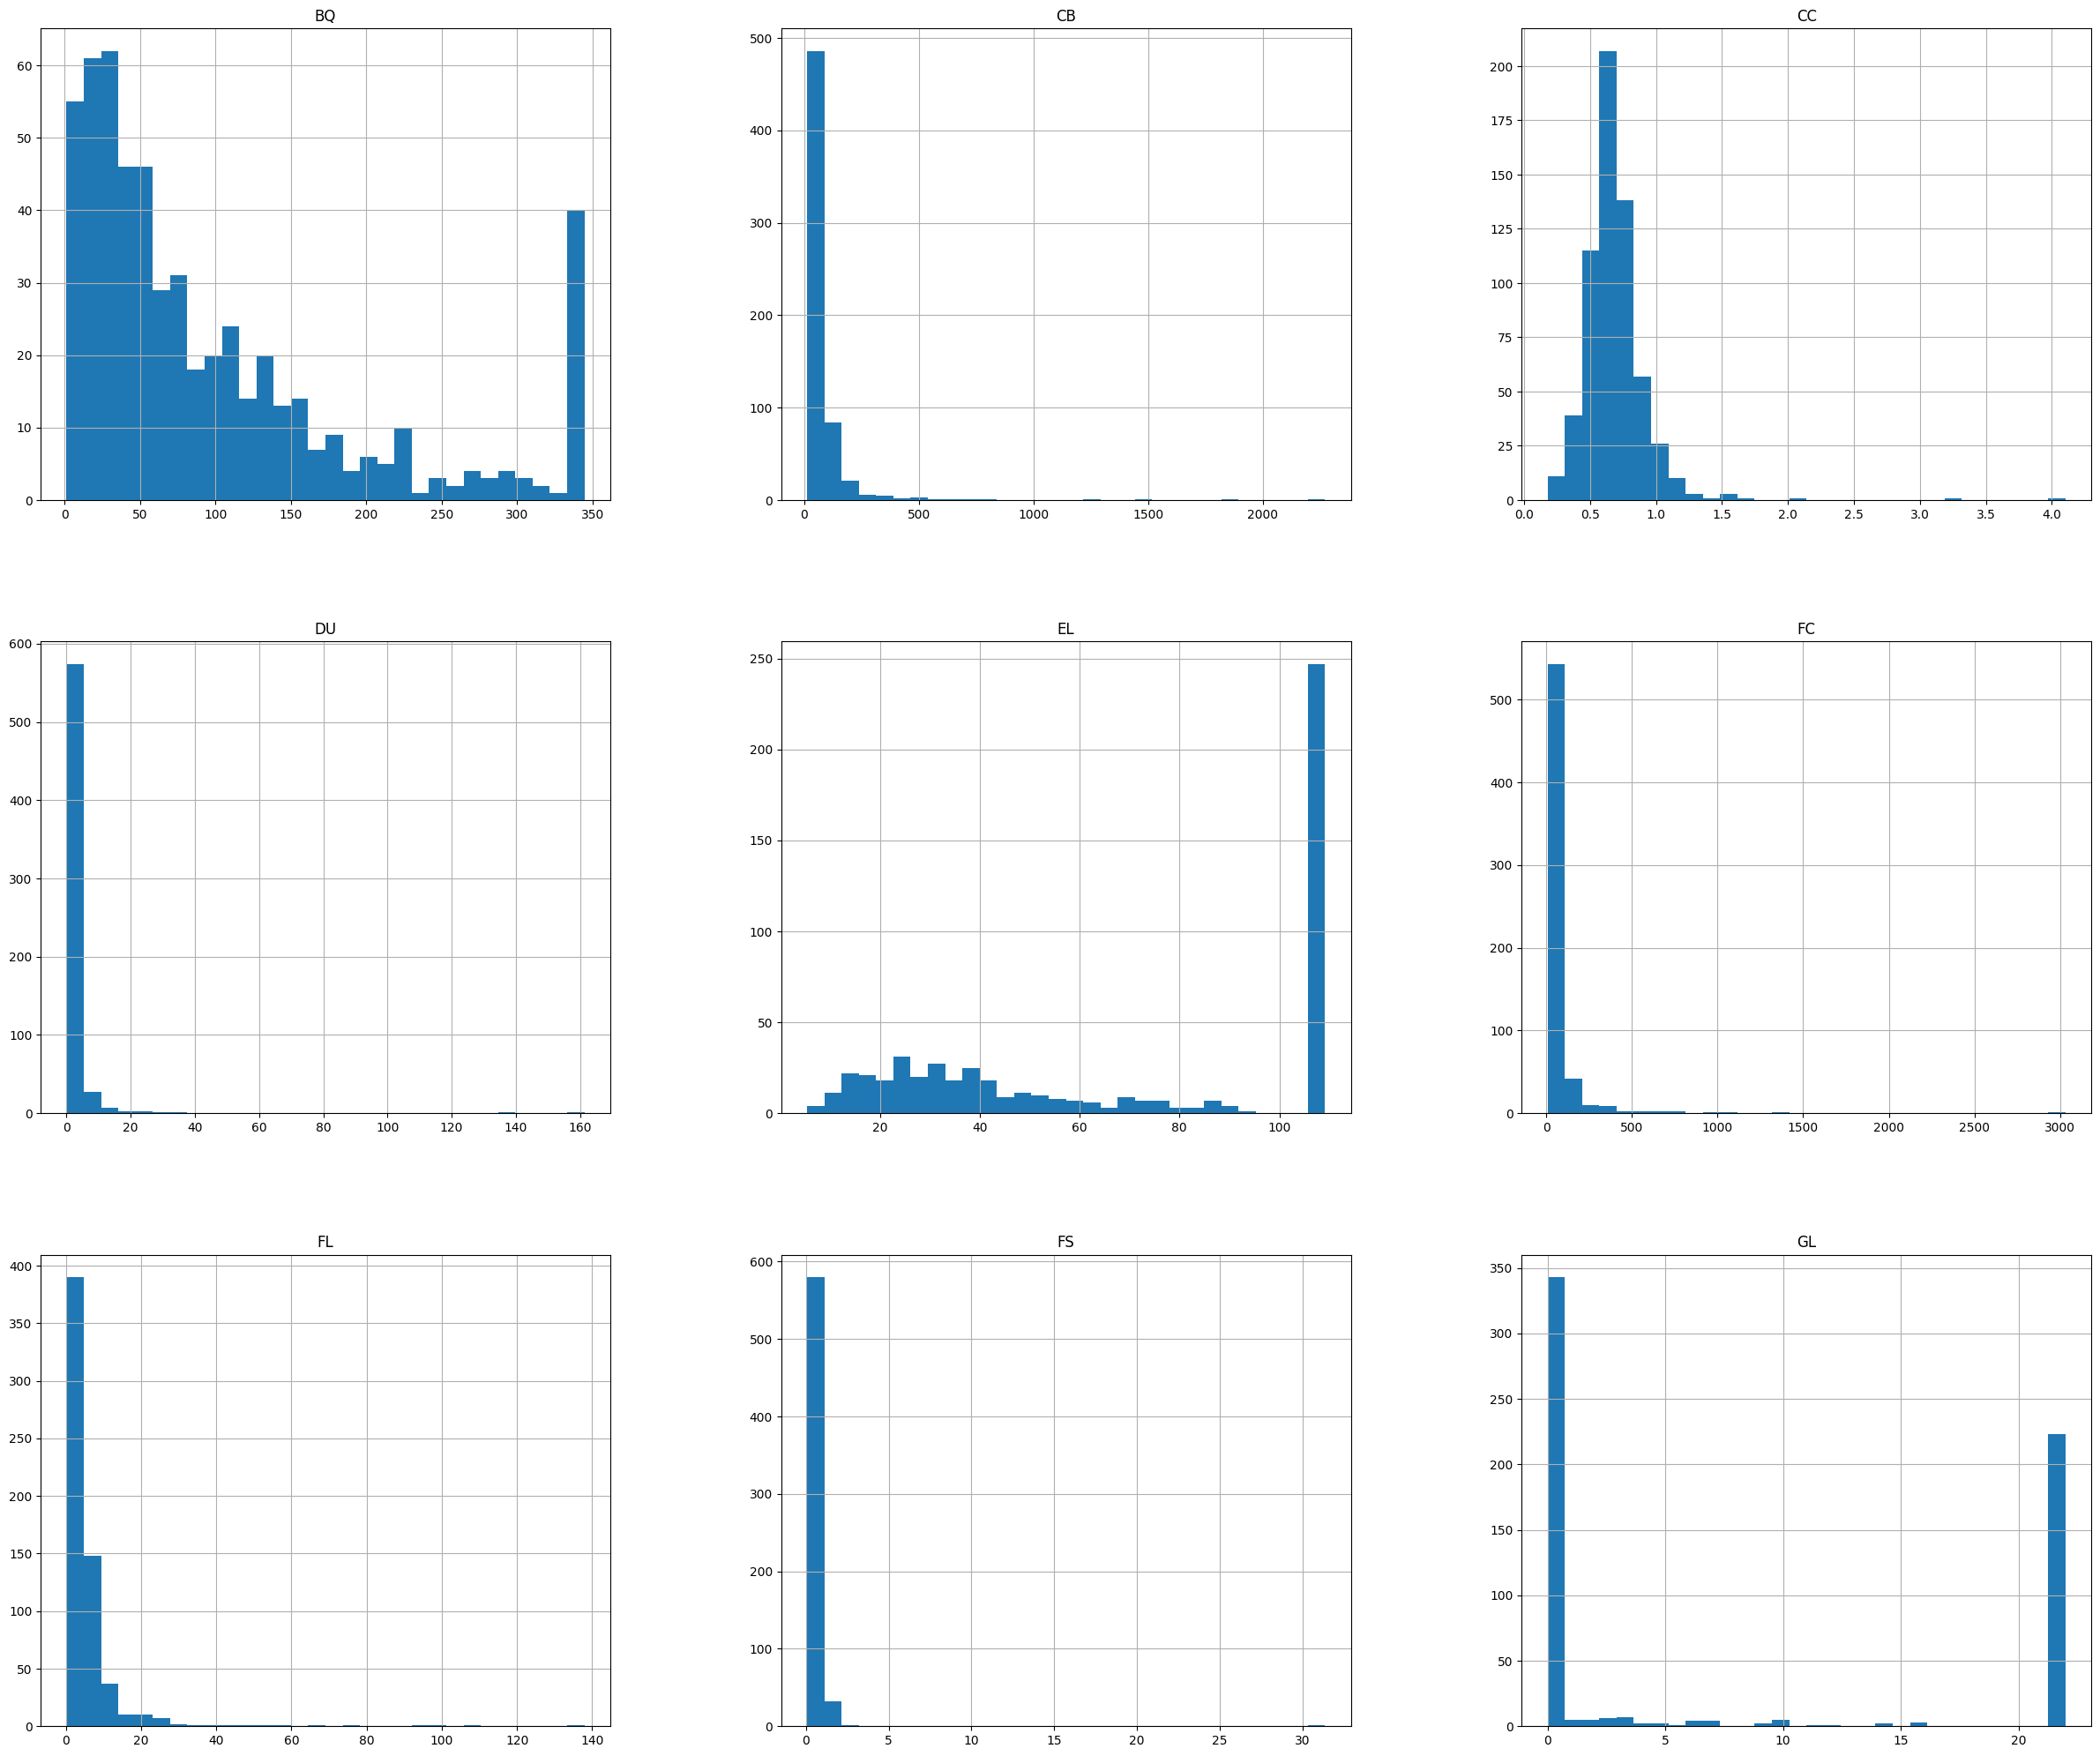

In [17]:
df[misscol].hist(figsize = (30, 25), bins = 30, legend = False)
plt.show()

## Skewness in data therefore applying median for missing values

In [18]:
df['EL'] = df['EL'].fillna((df['EL'].median()))
df['BQ'] = df['BQ'].fillna((df['BQ'].median()))
df['CC'] = df['CC'].fillna((df['CC'].median()))
df['FS'] = df['FS'].fillna((df['FS'].median()))
df['CB'] = df['CB'].fillna((df['CB'].median()))
df['FL'] = df['FL'].fillna((df['FL'].median()))
df['FC'] = df['FC'].fillna((df['FC'].median()))
df['DU'] = df['DU'].fillna((df['DU'].median()))
df['GL'] = df['GL'].fillna((df['GL'].median()))

In [19]:
import plotly.express as px

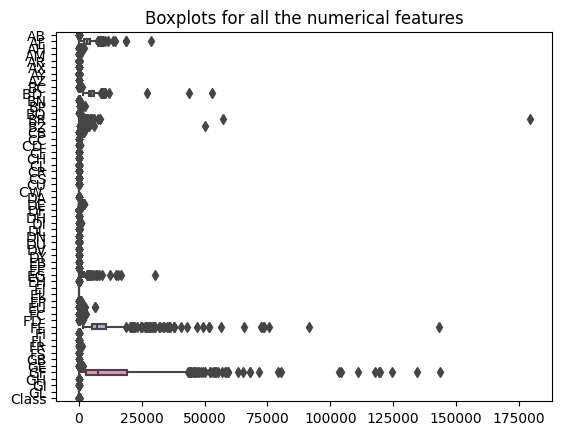

In [20]:
sns.boxplot(data=df, orient="h")
sns.set(rc={"figure.figsize":(20, 15)})
# Display
plt.title("Boxplots for all the numerical features")
plt.show()

In [21]:
df.isna().sum().any()

False

In [22]:
train_df=df

In [23]:
X=train_df.iloc[:,1:57]

In [24]:
y=train_df.iloc[:,57]

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

In [28]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
test_df=pd.read_csv("test.csv")

In [30]:
test_df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
test_df['EJ']=test_df['EJ'].map({'A':0,'B':1})

In [32]:
tf = test_df.drop(columns=['Id'],axis=0)
tf = sc.transform(tf)

In [33]:
tf

array([[-0.9788175 , -1.72291248, -0.99672109, -0.54800202, -1.14023836,
        -2.14150453, -0.13760173, -2.53937081, -0.12035743, -1.6528695 ,
        -6.13232133, -1.22870953, -1.04246972, -0.15423768, -0.24229634,
        -0.53178971, -2.68743142, -1.68731984, -0.78465512, -2.15736471,
        -0.83582088, -2.66200781, -2.48931569, -2.6598581 , -1.80695825,
        -2.463446  , -1.26910087, -0.30371248, -3.25890733, -1.7048489 ,
        -3.24377683, -3.30871997, -0.18693721, -1.56515612, -1.45648218,
        -1.59573437, -1.54879302, -0.92746989, -0.14960362, -1.34801441,
        -1.89667705, -1.77825867, -0.18470232, -0.40987447, -0.09946195,
        -0.88322035, -3.39939605, -0.45251902, -0.07188646, -0.30256109,
        -2.06470328, -0.89812054, -0.77880984, -3.19568862, -1.40554018,
        -0.82191751],
       [-0.9788175 , -1.72291248, -0.99672109, -0.54800202, -1.14023836,
        -2.14150453, -0.13760173, -2.53937081, -0.12035743, -1.6528695 ,
        -6.13232133, -1.22870

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [36]:
from collections import Counter
Counter(y_train)

Counter({0: 407, 1: 86})

In [37]:
os=SMOTE(random_state=2)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 407, 1: 86})
The number of classes after fit Counter({0: 407, 1: 407})


In [38]:
from sklearn import metrics
def plot_roc_curve(y_test, y_pred):
    auc = metrics.roc_auc_score(y_test, y_pred)
    false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
    plt.figure(figsize=(10, 8), dpi=100)
    plt.axis('scaled')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title("AUC & ROC Curve")
    plt.plot(false_positive_rate, true_positive_rate, 'g')
    plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

In [39]:
#calculate precision and recall
def plot_precision_recall_curve(y_test, y_pred):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

    #create precision recall curve
    fig, ax = plt.subplots()
    ax.plot(recall, precision, color='purple')

    #add axis labels to plot
    ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')

    #display plot
    plt.show()

In [40]:
from sklearn.pipeline import Pipeline

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
import numpy as np

In [43]:
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,4,6,10,15,20],
              'n_estimators' : [50,100,150,1000],
            'learning_rate' : [0.1,0.3,0.5,0.6,0.8],
            'min_child_weight' : [1,3,5,7],
             'subsample':[0.6,0.7,0.8,0.9,1]
             }
st_kf=StratifiedKFold(n_splits=5)
xgbc_random = RandomizedSearchCV(xgbc, xgbc_param,cv=st_kf, return_train_score=True,scoring = 'roc_auc',n_iter=100,random_state=42 )
eval_set = [(X_test, y_test)]
xgbc_random.fit(X_train_ns, y_train_ns,eval_metric="logloss", eval_set=eval_set, verbose=True)

Streaming output truncated to the last 5000 lines.
[6]	validation_0-logloss:0.32658
[7]	validation_0-logloss:0.32355
[8]	validation_0-logloss:0.31084
[9]	validation_0-logloss:0.30655
[10]	validation_0-logloss:0.31579
[0]	validation_0-logloss:0.44734
[1]	validation_0-logloss:0.37660
[2]	validation_0-logloss:0.33081
[3]	validation_0-logloss:0.30865
[4]	validation_0-logloss:0.30741
[5]	validation_0-logloss:0.31529
[6]	validation_0-logloss:0.28527
[7]	validation_0-logloss:0.29625
[0]	validation_0-logloss:0.49296
[1]	validation_0-logloss:0.40979
[2]	validation_0-logloss:0.38438
[3]	validation_0-logloss:0.35368
[4]	validation_0-logloss:0.31730
[5]	validation_0-logloss:0.32625
[6]	validation_0-logloss:0.31269
[7]	validation_0-logloss:0.29620
[8]	validation_0-logloss:0.28610
[9]	validation_0-logloss:0.28369
[10]	validation_0-logloss:0.26996
[11]	validation_0-logloss:0.28146
[12]	validation_0-logloss:0.28432
[0]	validation_0-logloss:0.51345
[1]	validation_0-logloss:0.46343
[2]	validation_0-logl

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=2,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importan...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.1, 0.3, 0.5, 0.6,
                                                          0.8],
                                        'max_depth': [2, 4, 6, 10, 15, 20],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [50, 100, 150, 1000],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1]},
                   random_state=42, return_train_score=True, scoring='roc_auc')

In [44]:
print("Best parameters: {}".format(xgbc_random.best_params_))

Best parameters: {'subsample': 0.9, 'n_estimators': 1000, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.1}


In [45]:
pipe3 = Pipeline([

     ('classifier', XGBClassifier( subsample= 0.6,
                                 n_estimators= 1000,
                                 min_child_weight= 1,
                                 max_depth= 4,
                                 learning_rate= 0.3,
                                 random_state=42))

])

In [46]:
pipe3.fit(X_train_ns, y_train_ns)
from sklearn.metrics import classification_report, confusion_matrix
y_pred=pipe3.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[100   2]
 [  5  17]]
0.9435483870967742
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       102
           1       0.89      0.77      0.83        22

    accuracy                           0.94       124
   macro avg       0.92      0.88      0.90       124
weighted avg       0.94      0.94      0.94       124



In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve
print('Accuracy: %.3f' % accuracy_score(y_test, pipe3.predict(X_test)))
from sklearn.metrics import log_loss
logloss = log_loss(y_test, pipe3.predict_proba(X_test))
print("logloss: ",round(logloss,3))
f1= f1_score(y_test,pipe3.predict(X_test), average='binary')
print("F1-score: ", round(f1,4))
print('Precision: %.3f' % precision_score(y_test, pipe3.predict(X_test)))
print('Recall: %.3f' % recall_score(y_test, pipe3.predict(X_test)))
auc = metrics.roc_auc_score(y_test, pipe3.predict(X_test))
print("auc=%.3f" % auc)

Accuracy: 0.944
logloss:  0.153
F1-score:  0.8293
Precision: 0.895
Recall: 0.773
auc=0.877


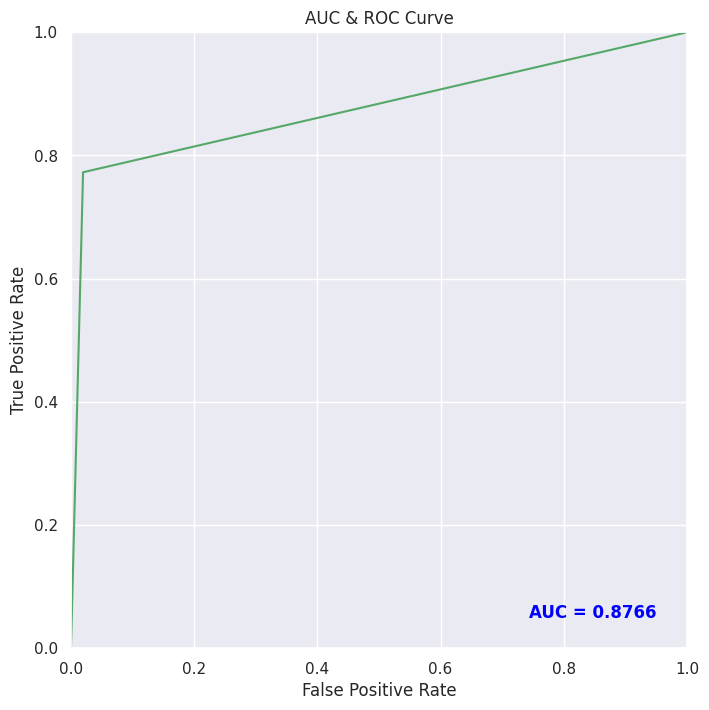

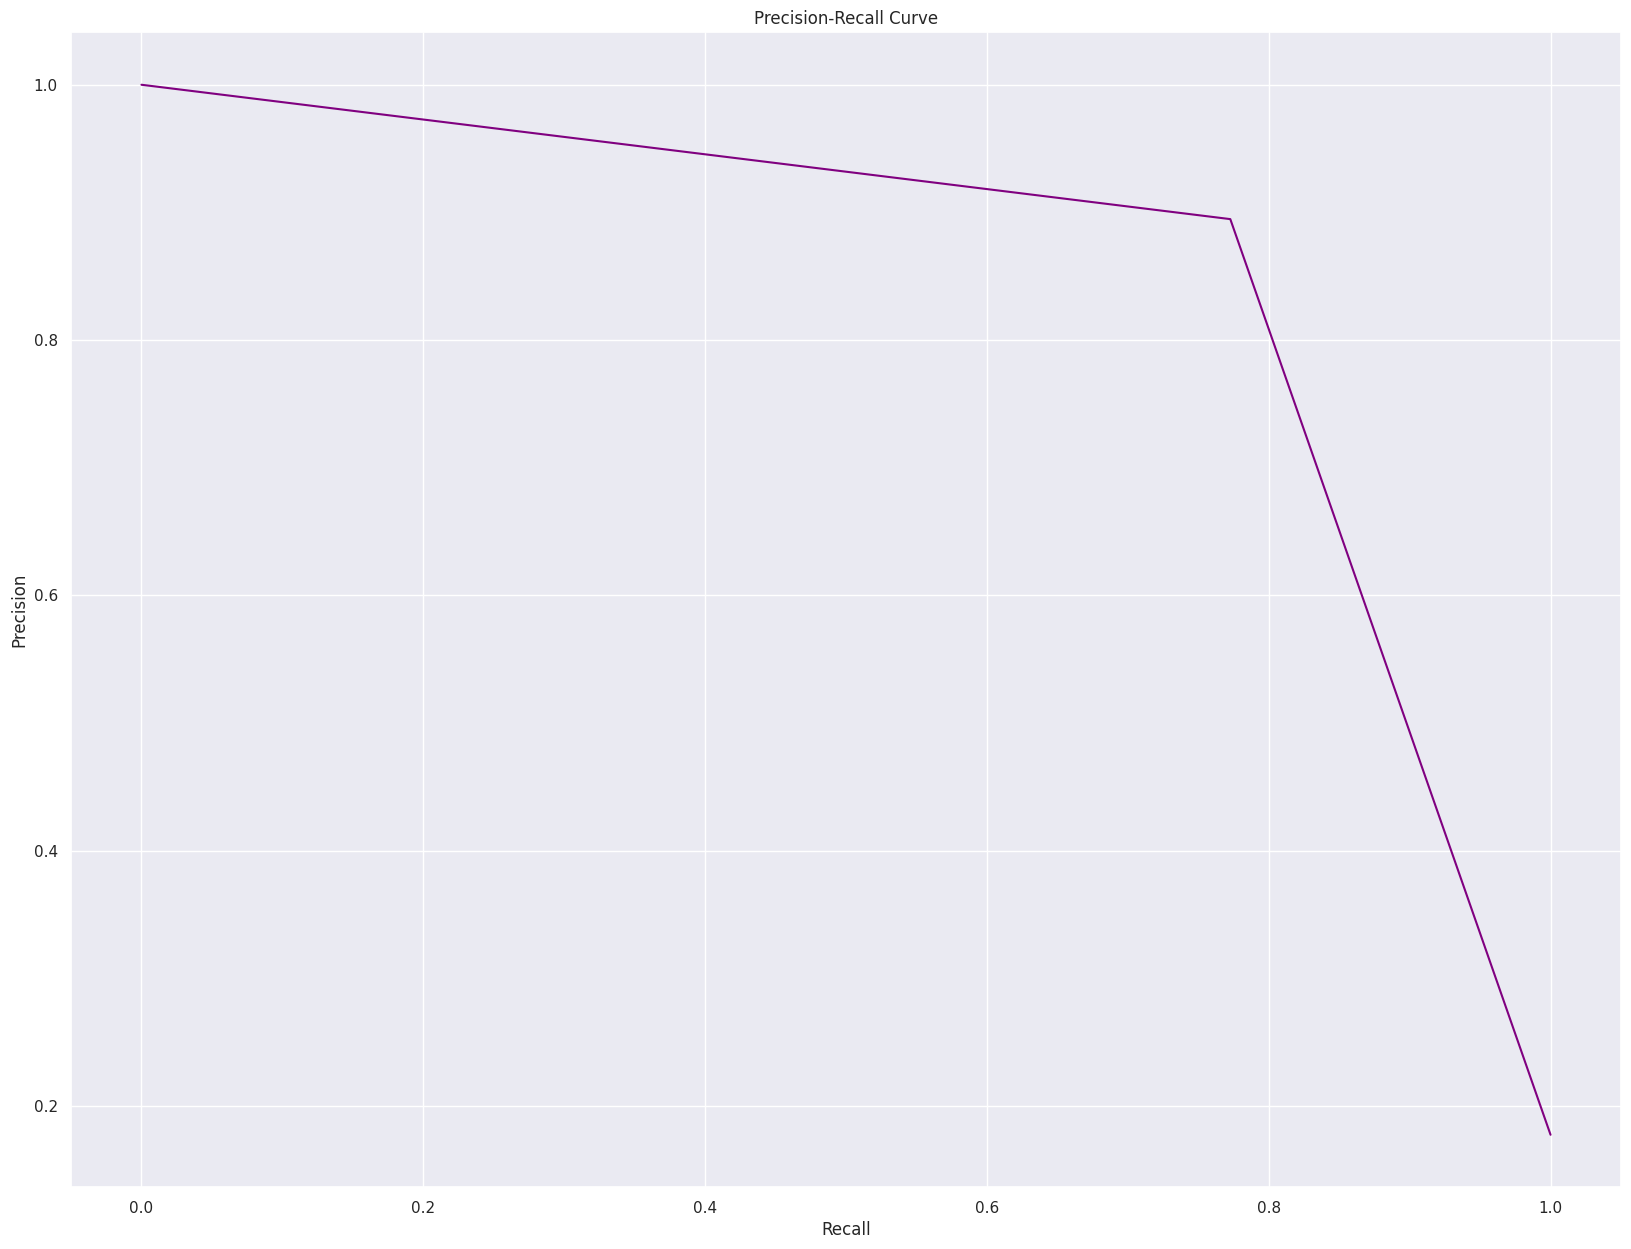

In [48]:
plot_roc_curve(y_test, pipe3.predict(X_test))
plot_precision_recall_curve(y_test, pipe3.predict(X_test))

In [49]:
model= XGBClassifier( subsample= 0.6,
                                n_estimators= 1000,
                                min_child_weight= 1,
                                max_depth= 4,
                                learning_rate= 0.3,
                                random_state=42)

In [50]:
model.fit(X_train_ns, y_train_ns)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [51]:
from matplotlib import pyplot
from xgboost import plot_importance
from xgboost import XGBClassifier
from xgboost import XGBClassifier, plot_importance

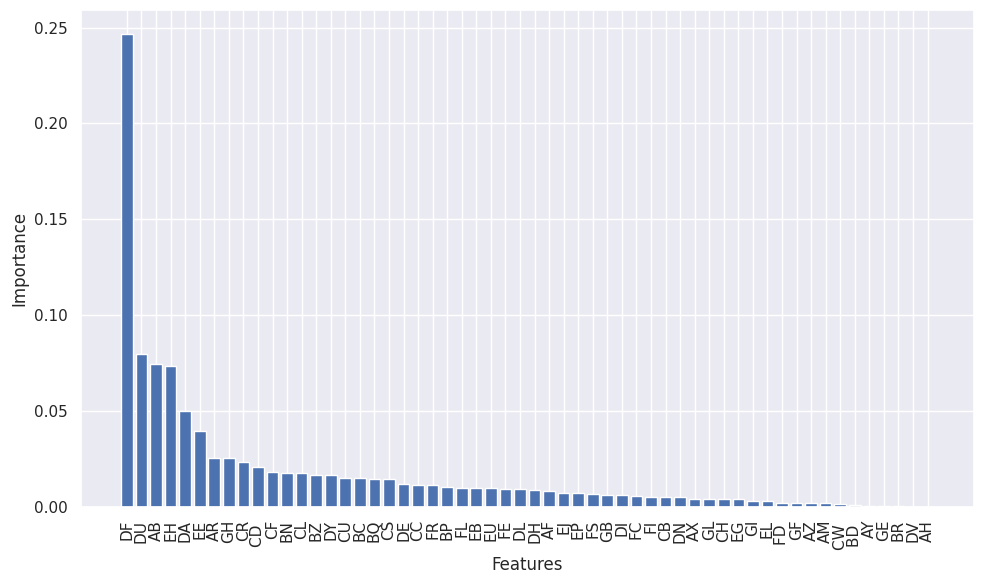

In [52]:
importances = model.feature_importances_
top_indices = importances.argsort()[::-1][:]
top_feature_names = X.columns[top_indices]
top_importances = importances[top_indices]

plt.figure(figsize = (10, 6))
plt.bar(range(len(top_feature_names)), top_importances)
plt.xticks(range(len(top_feature_names)), top_feature_names, rotation = 90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [53]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort


In [54]:
thresholds = sort(model.feature_importances_)

In [55]:
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_ns)
    # train model
    selection_model = XGBClassifier(subsample= 0.6,
                                n_estimators= 1000,
                                min_child_weight= 1,
                                max_depth= 4,
                                learning_rate= 0.3,
                                random_state=42)
    selection_model.fit(select_X_train, y_train_ns)
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    y_pred1 = selection_model.predict_proba(select_X_test)
    predictions = [round(value) for value in y_pred]
    prediction = [value for value in y_pred1]
    accuracy = accuracy_score(y_test, predictions)
    logloss = round(log_loss(y_test, prediction),3)
    Precisionscore = precision_score(y_test, predictions)
    f1score = f1_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    auc = metrics.roc_auc_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%, logloss=%.3f, precisionscore=%.3f, F1score=%.3f, recall=%.3f, auc=%.3f" % (thresh, select_X_train.shape[1], accuracy*100.0, logloss, Precisionscore, f1score, recall, auc))

Thresh=0.000, n=56, Accuracy: 94.35%, logloss=0.153, precisionscore=0.895, F1score=0.829, recall=0.773, auc=0.877
Thresh=0.000, n=56, Accuracy: 94.35%, logloss=0.153, precisionscore=0.895, F1score=0.829, recall=0.773, auc=0.877
Thresh=0.000, n=54, Accuracy: 94.35%, logloss=0.153, precisionscore=0.895, F1score=0.829, recall=0.773, auc=0.877
Thresh=0.000, n=53, Accuracy: 95.16%, logloss=0.152, precisionscore=0.900, F1score=0.857, recall=0.818, auc=0.899
Thresh=0.001, n=52, Accuracy: 95.16%, logloss=0.140, precisionscore=0.900, F1score=0.857, recall=0.818, auc=0.899
Thresh=0.001, n=51, Accuracy: 95.16%, logloss=0.142, precisionscore=0.900, F1score=0.857, recall=0.818, auc=0.899
Thresh=0.002, n=50, Accuracy: 94.35%, logloss=0.189, precisionscore=0.857, F1score=0.837, recall=0.818, auc=0.894
Thresh=0.002, n=49, Accuracy: 92.74%, logloss=0.193, precisionscore=0.810, F1score=0.791, recall=0.773, auc=0.867
Thresh=0.002, n=48, Accuracy: 94.35%, logloss=0.154, precisionscore=0.857, F1score=0.837

In [56]:
importances = model.feature_importances_
top_indices = importances.argsort()[::-1][:52]
top_feature_names = X.columns[top_indices]
top_importances = importances[top_indices]

In [57]:
top_feature_names

Index(['DF', 'DU', 'AB', 'EH', 'DA', 'EE', 'AR', 'GH', 'CR', 'CD ', 'CF', 'BN',
       'CL', 'BZ', 'DY', 'CU', 'BC', 'BQ', 'CS', 'DE', 'CC', 'FR', 'BP', 'FL',
       'EB', 'EU', 'FE', 'DL', 'DH', 'AF', 'EJ', 'EP', 'FS', 'GB', 'DI', 'FC',
       'FI', 'CB', 'DN', 'AX', 'GL', 'CH', 'EG', 'GI', 'EL', 'FD ', 'GF', 'AZ',
       'AM', 'CW ', 'BD ', 'AY'],
      dtype='object')

In [58]:
X_train_df = pd.DataFrame(X_train_ns)
y_train_df = pd.DataFrame(y_train_ns)

In [59]:
X_train_df

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,-0.632923,-0.949501,-0.263144,-0.354858,-0.201277,0.083184,-0.030176,-0.258262,-0.039161,0.013384,...,0.150544,-0.438346,-0.036026,0.194507,-0.106732,1.054971,0.004009,-0.481870,1.424759,1.316702
1,0.110749,0.717663,-0.062110,-0.454650,-0.201277,0.148114,0.019607,-0.416150,0.076005,-0.831181,...,-0.082345,-0.438346,-0.063017,-0.185328,-0.521587,-0.394262,-0.714218,-0.799016,-1.143319,1.316702
2,-0.537802,-0.476063,-0.263144,-0.293009,-0.201277,-0.767734,0.098212,-0.691327,-0.071581,-0.446374,...,0.295289,-0.438346,-0.063017,-0.255668,-0.920874,-0.394262,-0.163882,0.413069,-0.676792,1.316702
3,0.326933,1.097547,-0.130946,3.038008,2.391755,-0.487512,-0.082579,0.152247,-0.103421,-0.135086,...,-0.708641,1.073151,-0.057340,-0.213464,-0.444661,-0.143927,-0.741026,-0.242316,2.795991,-0.821683
4,1.260848,-0.085977,0.025847,0.100712,-0.201277,1.026370,-0.082579,-0.156011,-0.103421,0.383064,...,2.215931,-0.416992,-0.051529,0.883837,-0.011489,-0.394262,-0.026810,1.177307,-0.804475,-0.669534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,-0.581531,-1.428951,-0.263144,-0.435270,-0.121885,-0.122440,-0.010646,-1.728878,-0.083442,0.400348,...,-0.358920,1.783785,-0.051828,-0.004681,0.015649,-0.311130,-0.572077,-1.452583,-0.185861,-0.816808
810,-0.019224,0.068311,-0.227095,-0.223564,1.879565,0.711782,-0.017700,-1.690158,-0.103421,-0.750594,...,-0.812316,-0.438346,-0.063017,-0.119070,-0.867862,-0.394262,0.024056,-0.929366,0.372976,1.316702
811,-0.217245,-0.213110,-0.263144,0.085195,0.277092,-0.441059,-0.082579,0.743820,-0.103421,0.299883,...,-0.415807,1.108908,-0.044825,-0.244490,-0.466722,-0.269927,0.424244,-0.914503,-0.052996,-0.811607
812,0.720324,0.213643,-0.263144,0.299155,-0.201277,0.046701,-0.082579,0.555835,-0.004637,0.523415,...,1.074172,0.112673,-0.045492,0.194142,0.090354,-0.394262,-0.417950,0.848782,-0.061473,-0.738600


In [60]:
X_train_df.columns = X.columns

In [61]:
X_train_df.columns

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU',
       'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB',
       'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL',
       'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL'],
      dtype='object')

In [62]:
col = [x for x in X_train_df.columns if x not in top_feature_names]

In [63]:
col

['AH', 'BR', 'DV', 'GE']

In [64]:
X_train_df.drop(columns=col,axis=1,inplace=True)

In [65]:
model = XGBClassifier(subsample= 0.6,
                                n_estimators= 1000,
                                min_child_weight= 1,
                                max_depth= 4,
                                learning_rate= 0.3,
                                random_state=42)

In [66]:
model.fit(X_train_df, y_train_df)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [67]:
X_test_df = pd.DataFrame(X_test)

In [68]:
X_test_df.columns = X.columns

In [69]:
X_test_df.drop(columns=col,axis=1,inplace=True)

In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve
print('Accuracy: %.3f' % accuracy_score(y_test, model.predict(X_test_df)))
from sklearn.metrics import log_loss
logloss = log_loss(y_test, model.predict_proba(X_test_df))
print("logloss: ",round(logloss,4))
f1= f1_score(y_test,model.predict(X_test_df), average='binary')
print("F1-score: ", round(f1,4))
print('Precision: %.3f' % precision_score(y_test, model.predict(X_test_df)))
print('Recall: %.3f' % recall_score(y_test, model.predict(X_test_df)))
auc = metrics.roc_auc_score(y_test, model.predict(X_test_df))
print("auc=%.3f" % auc)

Accuracy: 0.952
logloss:  0.1397
F1-score:  0.8571
Precision: 0.900
Recall: 0.818
auc=0.899


In [71]:
test_df_new = pd.DataFrame(tf)

In [72]:
test_df_new.columns = X.columns

In [73]:
test_df_new.drop(columns=col,axis=1,inplace=True)

In [74]:
preds = model.predict_proba(test_df_new)
preds

array([[0.9922353 , 0.00776472],
       [0.9922353 , 0.00776472],
       [0.9922353 , 0.00776472],
       [0.9922353 , 0.00776472],
       [0.9922353 , 0.00776472]], dtype=float32)

In [77]:
final_test = pd.DataFrame({'Id' : test_df['Id'], "class_0" : preds[:, 0], "class_1" : preds[:, 1] })
final_test

,Id,class_0,class_1
0,00eed32682bb,0.992235,0.007765
1,010ebe33f668,0.992235,0.007765
2,02fa521e1838,0.992235,0.007765
3,040e15f562a2,0.992235,0.007765
4,046e85c7cc7f,0.992235,0.007765


In [79]:
final_test.to_csv("predictions",index=False)